### Import libraries and Use GPU

In [44]:
import tensorflow as tf
from tensorflow import keras

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Veysi ADIN 19 SEPT 2022
from pandas import read_csv
from numpy import set_printoptions
from sklearn import datasets, linear_model
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
import random
# Using GPU
import os
import scipy.io as scpy
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"] = '0'  # Set to -1 if CPU should be used CPU = -1 , GPU = 0

gpus = tf.config.experimental.list_physical_devices('GPU')
cpus = tf.config.experimental.list_physical_devices('CPU')

if gpus:
    try:
        # Currently, memory growth needs to be the same across GPUs
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        # Memory growth must be set before GPUs have been initialized
        print(e)
elif cpus:
    try:
        # Currently, memory growth needs to be the same across GPUs
        logical_cpus= tf.config.experimental.list_logical_devices('CPU')
        print(len(cpus), "Physical CPU,", len(logical_cpus), "Logical CPU")
    except RuntimeError as e:
        # Memory growth must be set before GPUs have been initialized
        print(e)


1 Physical GPUs, 1 Logical GPUs


### Read CSV data, that is already converted from wav files in speech command dataset

In [45]:
import sys, os, os.path
from scipy.io import wavfile
import pandas as pd
import csv
import matplotlib.pyplot as plt
import numpy as np
import os


num_of_samples = 3000
path = '/home/veysiadn/Downloads/google_speech_3classes/speech_no_csv'
filename_csv_no = np.zeros(num_of_samples)
filename_csv_no = filename_csv_no.astype(np.str)
i=0;
for file_name in os.listdir(path):
    filename_csv_no[i] = file_name;
    i= i+1;
    
samples_no = np.zeros((num_of_samples,16000))
for i in range(num_of_samples):
    file = open(str('/home/veysiadn/Downloads/google_speech_3classes/speech_no_csv/' + filename_csv_no[i]))
    type(file)
    csvreader = csv.reader(file)
    header = []
    header = next(csvreader)
    rows = []
    for row in csvreader:
            rows.append(row)
    for j in range(len(rows)):
        samples_no[i][j] = rows[j][1]


path = '/home/veysiadn/Downloads/google_speech_3classes/speech_yes_csv'
filename_csv_no = np.zeros(num_of_samples)
filename_csv_no = filename_csv_no.astype(np.str)
i=0;
for file_name in os.listdir(path):
    filename_csv_no[i] = file_name;
    i= i+1;
    
samples_yes = np.zeros((num_of_samples,16000))
for i in range(num_of_samples):
    file = open(str('/home/veysiadn/Downloads/google_speech_3classes/speech_yes_csv/' + filename_csv_no[i]))
    type(file)
    csvreader = csv.reader(file)
    header = []
    header = next(csvreader)
    rows = []
    for row in csvreader:
            rows.append(row)
    for j in range(len(rows)):
        samples_yes[i][j] = rows[j][1]

path = '/home/veysiadn/Downloads/google_speech_3classes/speech_zero_csv'
filename_csv_no = np.zeros(3000)
filename_csv_no = filename_csv_no.astype(np.str)
i=0;
for file_name in os.listdir(path):
    filename_csv_no[i] = file_name;
    i= i+1;
    
samples_zero = np.zeros((num_of_samples,16000))
for i in range(num_of_samples):
    file = open(str('/home/veysiadn/Downloads/google_speech_3classes/speech_zero_csv/' + filename_csv_no[i]))
    type(file)
    csvreader = csv.reader(file)
    header = []
    header = next(csvreader)
    rows = []
    for row in csvreader:
            rows.append(row)
    for j in range(len(rows)):
        samples_zero[i][j] = rows[j][1]


/tmp/ipykernel_10760/1926382603.py:13: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  filename_csv_no = filename_csv_no.astype(np.str)
/tmp/ipykernel_10760/1926382603.py:35: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  filename_csv_no = filename_csv_no.astype(np.str)
/tmp/ipykernel_10760/1926382603.py:56: DeprecationWarning: `np.str` is a deprecated alias 

### Check shapes and prepare data for training and testing

In [46]:
print(samples_no.shape)
print(samples_yes.shape)
print(samples_zero.shape)
num_of_classes = 3 
y_data = np.zeros((num_of_samples* num_of_classes,1))
y_data[num_of_samples:2*num_of_samples] = 1
y_data[2*num_of_samples:3*num_of_samples] = 2
x_data = np.concatenate((samples_no,samples_yes,samples_zero),axis=0)
print(x_data.shape)
print(y_data.shape)
SEED = 99
os.environ['PYTHONHASHSEED']=str(SEED)
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)
# split into train test sets
x_train, x_val_to_use, y_train, y_val_to_use = train_test_split(x_data, y_data, test_size=0.3, random_state=SEED)
x_val, x_test, y_val, y_test = train_test_split(x_val_to_use, y_val_to_use, test_size=0.5, random_state=SEED)


class_num = 0
class_indices = np.where(y_train == class_num)[0]
class_data = x_train[class_indices]
class_output = y_train[class_indices]
print(class_data.shape)

class_num = 1
class_indices = np.where(y_train == class_num)[0]
class_data = x_train[class_indices]
class_output = y_train[class_indices]

print(class_data.shape)
class_num = 2
class_indices = np.where(y_train == class_num)[0]
class_data = x_train[class_indices]
class_output = y_train[class_indices]
print(class_data.shape)


(3000, 16000)
(3000, 16000)
(3000, 16000)
(9000, 16000)
(9000, 1)
(2086, 16000)
(2089, 16000)
(2125, 16000)


### Check the data shape

In [29]:
len(x_train), len(x_val), len(x_test)

(6300, 1350, 1350)

### Define the model and start training

In [ ]:
SEED = 99
os.environ['PYTHONHASHSEED']=str(SEED)
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)

dense_model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(16000,)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(3,activation='softmax')
])


dense_model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=1e-2),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])
dense_model.summary()              

history=dense_model.fit(x_train,y_train, validation_data=(x_val,y_val), epochs=100,verbose=1)
# dense_model.evaluate(val_dataset)
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['val_loss'])


plt.title('dense_model loss & accuracy')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['tr_loss', 'tr_accuracy', 'val_acc', 'val_loss'], loc='lower right')
# accuracy!
print("Training results")
print(f"Training Accuracy: {history.history['accuracy'][-1]}")
print(f"Training Loss: {history.history['loss'][-1]}")

# evaluating dense_model
print("Evaluation results")
print(f"Validation Accuracy: {history.history['val_accuracy'][-1]}")
print(f"Validation Loss: {history.history['val_loss'][-1]}")


plt.show()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_17 (Conv1D)          (None, 15994, 32)         256       
                                                                 
 activation_17 (Activation)  (None, 15994, 32)         0         
                                                                 
 max_pooling1d_28 (MaxPoolin  (None, 1999, 32)         0         
 g1D)                                                            
                                                                 
 conv1d_18 (Conv1D)          (None, 1995, 48)          7728      
                                                                 
 activation_18 (Activation)  (None, 1995, 48)          0         
                                                                 
 max_pooling1d_29 (MaxPoolin  (None, 498, 48)          0         
 g1D)                                                 

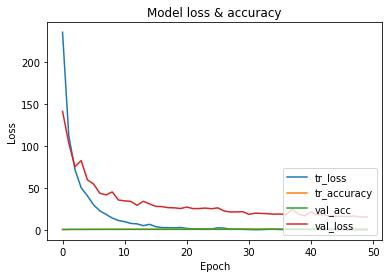

In [111]:
import tensorflow_model_optimization as tfmot

model = tf.keras.Sequential()
model.add(tf.keras.layers.InputLayer(input_shape=(16000,1)))
model.add(tf.keras.layers.Conv1D(32,7))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.MaxPooling1D(pool_size=8))
model.add(tf.keras.layers.Conv1D(48,5))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.MaxPooling1D(pool_size=4))
model.add(tf.keras.layers.MaxPooling1D(pool_size=4))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(32))
model.add(tf.keras.layers.Dense(32))
model.add(tf.keras.layers.Dense(3, activation='softmax'))
print(model.summary())
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train ,epochs=50, validation_data=(x_val, y_val), verbose=1)   


# Plotting accuracy and loss
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['val_loss'])


plt.title('Model loss & accuracy')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['tr_loss', 'tr_accuracy', 'val_acc', 'val_loss'], loc='lower right')
# accuracy!
print("Training results")
print(f"Training Accuracy: {history.history['accuracy'][-1]}")
print(f"Training Loss: {history.history['loss'][-1]}")

# evaluating model
print("Evaluation results")
print(f"Validation Accuracy: {history.history['val_accuracy'][-1]}")
print(f"Validation Loss: {history.history['val_loss'][-1]}")


plt.show()

In [103]:
model.evaluate(x_val, y_val)

43/43 [==============================] - 0s 1ms/step - loss: 2.9882 - accuracy: 0.7133


[2.9881768226623535, 0.7133333086967468]

In [101]:
y_pred = model.predict(x_val)
y_true = y_val


43/43 [==============================] - 0s 826us/step


In [106]:
scce = tf.keras.losses.MeanAbsoluteError()
scce(y_true, y_pred).numpy()

0.87456787

In [113]:
from tensorflow.keras import layers

model = tf.keras.Sequential()
model.add(layers.InputLayer(input_shape=(16000,1)))
model.add(layers.Conv1D(32,9))
model.add(layers.Activation('relu'))
model.add(layers.Conv1D(64,7))
model.add(layers.Activation('relu'))
model.add(layers.Conv1D(256,5))
model.add(layers.Activation('relu'))
model.add(layers.AveragePooling1D(pool_size=40))
model.add(layers.MaxPooling1D(pool_size=9))
model.add(layers.Flatten())
model.add(layers.Dense(3))
print(model.summary())
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=100, validation_data=(x_val,y_val))

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_22 (Conv1D)          (None, 15992, 32)         320       
                                                                 
 activation_22 (Activation)  (None, 15992, 32)         0         
                                                                 
 conv1d_23 (Conv1D)          (None, 15986, 64)         14400     
                                                                 
 activation_23 (Activation)  (None, 15986, 64)         0         
                                                                 
 conv1d_24 (Conv1D)          (None, 15982, 256)        82176     
                                                                 
 activation_24 (Activation)  (None, 15982, 256)        0         
                                                                 
 average_pooling1d_2 (Averag  (None, 399, 256)        

In [19]:
model.evaluate(x_test, y_test)

43/43 [==============================] - 1s 19ms/step - loss: 0.4374 - accuracy: 0.8622


[0.43744343519210815, 0.8622221946716309]